In [27]:
#### Importando las bibliotecas####
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
from scipy.integrate import odeint as ode
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import odeint as ode
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 10


In [28]:
datosCompletos = pd.read_csv("datos\DEN_2020.csv",usecols=["Departamento","numero_casos","Semana"],sep=";")
datosCompletos.head()

,Departamento,numero_casos,Semana
0,LAMBAYEQUE,3 casos,51
1,LAMBAYEQUE,1 caso,24
2,LAMBAYEQUE,2 casos,26
3,LAMBAYEQUE,3 casos,53
4,LAMBAYEQUE,3 casos,52


In [45]:
datosCiudad=datosCompletos[datosCompletos.Departamento=="LIMA"]
datosCiudad['numero_casos']=(datosCiudad.numero_casos.str.split(' ').str[0]).astype(int)


<ipython-input-45-f241d28b2546>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosCiudad['numero_casos']=(datosCiudad.numero_casos.str.split(' ').str[0]).astype(int)


In [46]:
datosCiudad.sort_values(by=['Semana'],inplace=True)
datosCiudad.head(100)

<ipython-input-46-784cad9f9180>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosCiudad.sort_values(by=['Semana'],inplace=True)


,Departamento,numero_casos,Semana
18337,LIMA,0,1
2596,LIMA,0,1
211,LIMA,0,1
17648,LIMA,0,1
17913,LIMA,0,1
...,...,...,...
207,LIMA,0,5
1903,LIMA,2,5
3970,LIMA,0,5
14782,LIMA,0,5


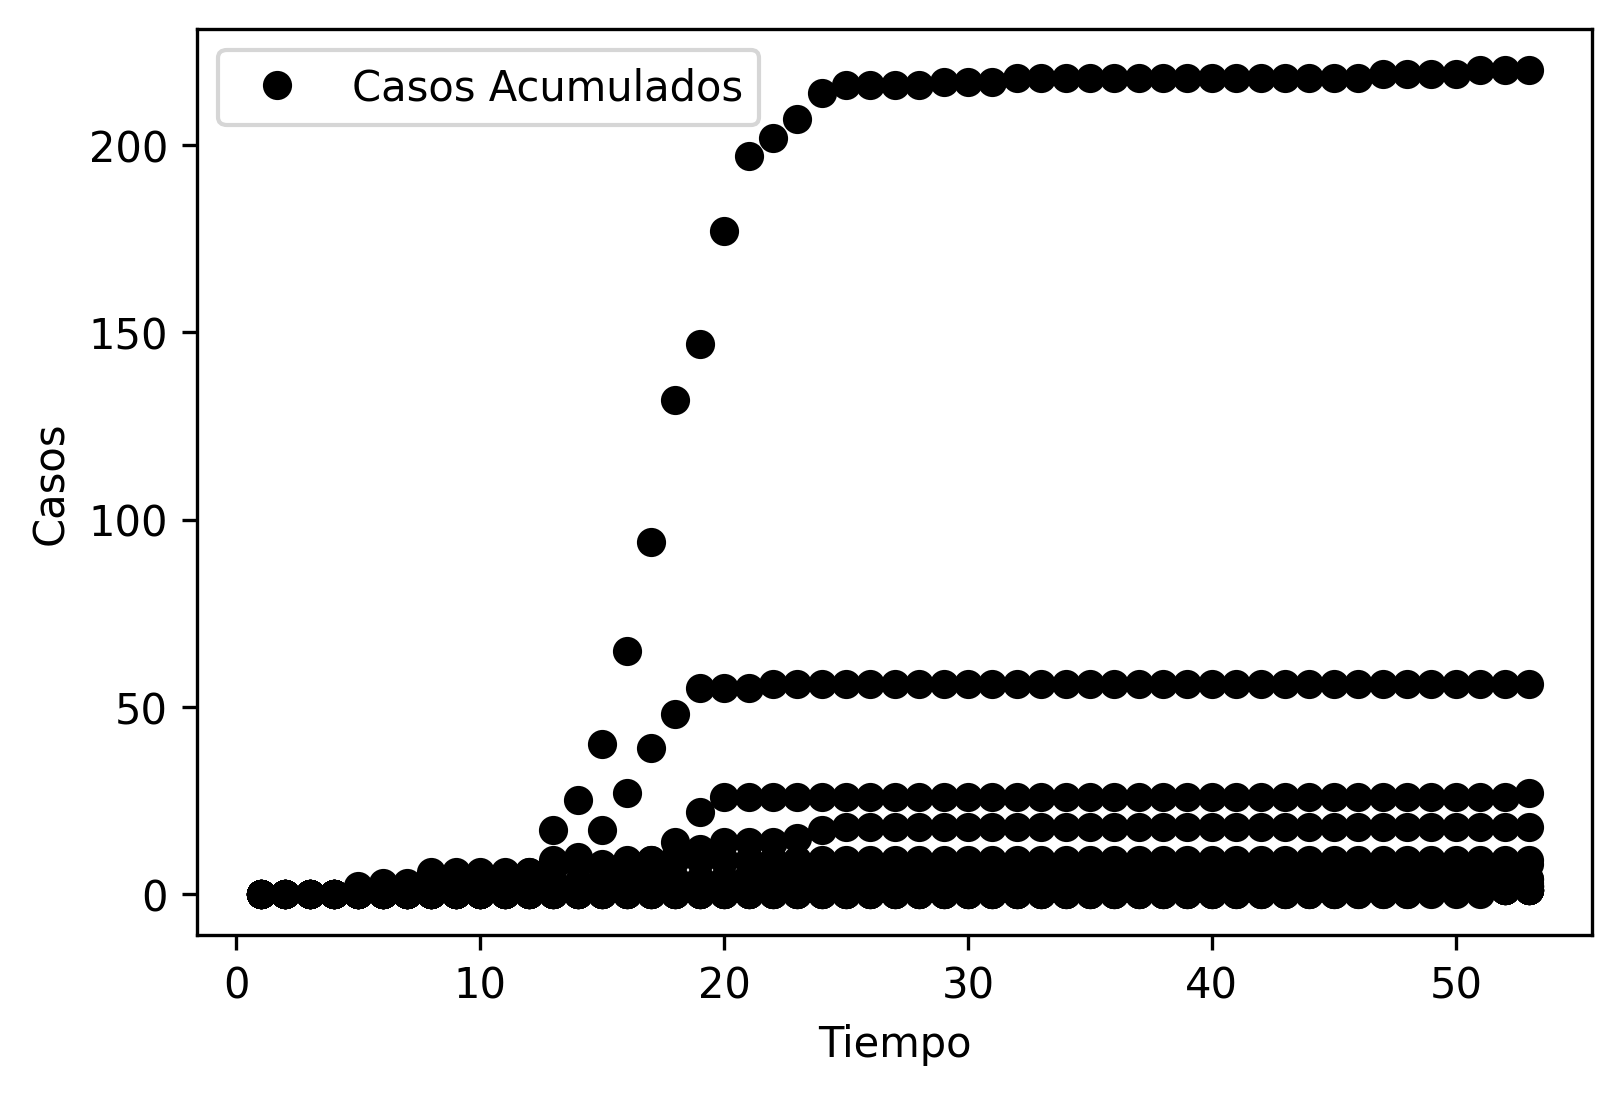

In [56]:
C=datosCiudad.numero_casos.values.astype(int)

S=datosCiudad.Semana.values
plt.plot(S,C, 'ko', linewidth=2, label='Casos Acumulados')
plt.xlabel('Tiempo')
plt.ylabel('Casos')
plt.legend()
plt.show()

In [57]:
df=datosCiudad.groupby(['Semana'])['numero_casos'].sum()

df.head()

Semana
1    0
2    0
3    0
4    0
5    2
Name: numero_casos, dtype: int32

Cargamos los datos en $\textit{data}$ tenemos los puntos reales de nuestra observación, en $\textit{times}$ tenemos la secuencia de tiempo que corresponde a cada observación. La observación es el parámetro de número de infectados en el modelo SIR.

In [58]:
C=df.values

S=df.index.values

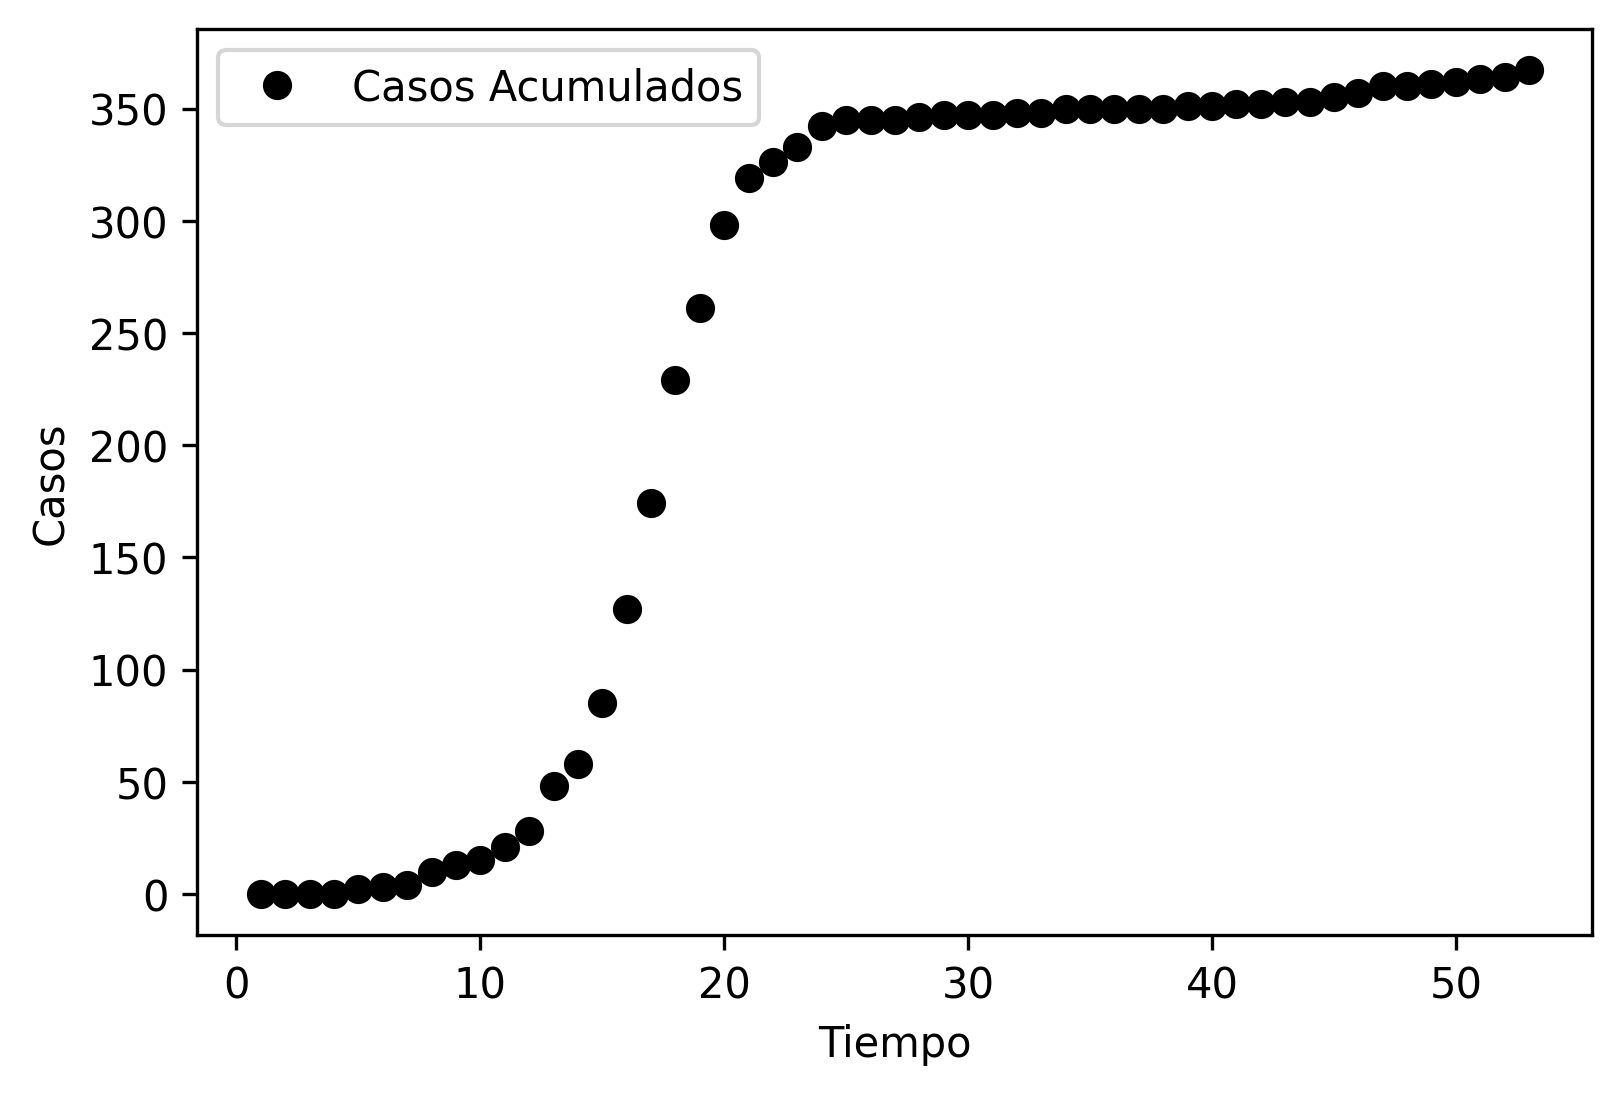

In [59]:
plt.plot(S,C, 'ko', linewidth=2, label='Casos Acumulados')
plt.xlabel('Tiempo')
plt.ylabel('Casos')
plt.legend()
plt.show()

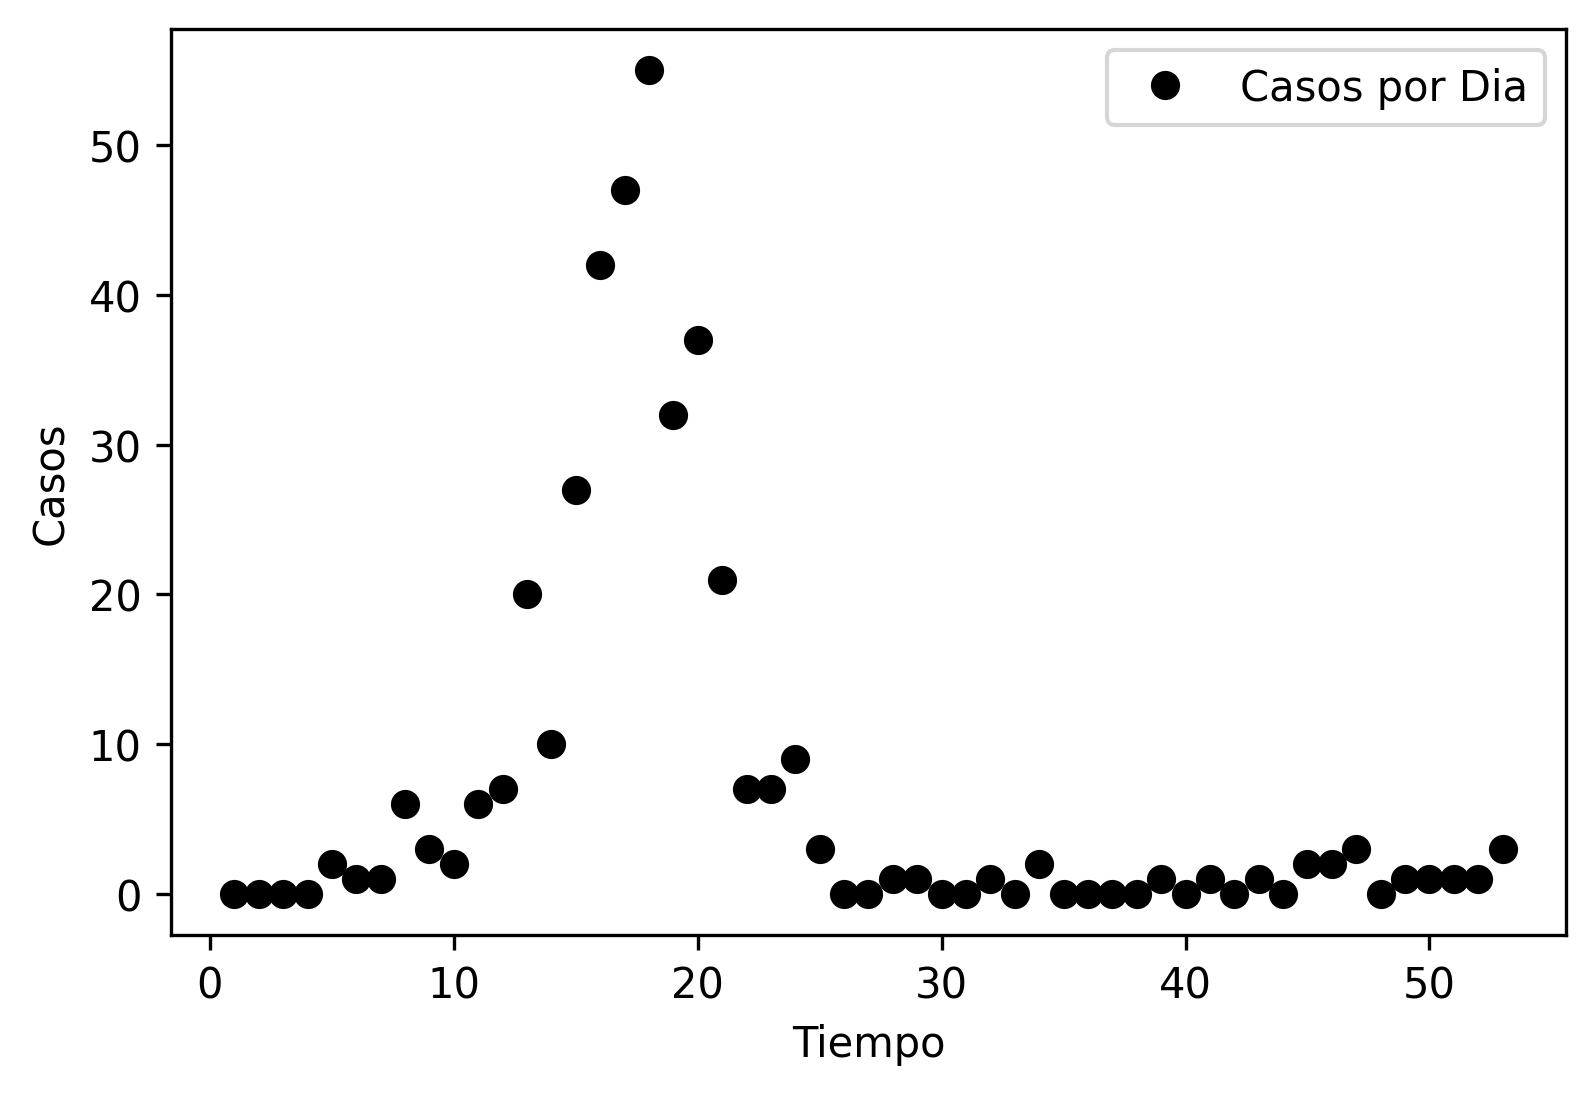

In [60]:
CD=np.diff(C,prepend=[0])
plt.plot(S,CD, 'ko', linewidth=2, label='Casos por Dia')
plt.xlabel('Tiempo')
plt.ylabel('Casos')
plt.legend()
plt.show()